In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [27]:
# Create a Model Class that inherits from nn.Module
# Use the IRIS dataset to create a simple model

class Model(nn.Module):
    def __init__(self, input_features = 4, hidden_layer1 = 8, hidden_layer2 = 9, output_features = 3):
        super().__init__() #super() is used to call the __init__ method of the parent class
        self.fc1 = nn.Linear(input_features, hidden_layer1)  #fc1 = fully connected layer 1
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2) #fc2 = fully connected layer 2
        self.output = nn.Linear(hidden_layer2, output_features) #fc3 = fully connected layer 3
    
    def forward(self, x):
        x = F.relu(self.fc1(x)) # F is the function doing the forward pass of the model
        x = F.relu(self.fc2(x))
        x = self.output(x)
        return x

IMPORT OUR DATASET

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
# Load the IRIS dataset
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
df = pd.read_csv(url)
df.head(100)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Versicolor
96,5.7,2.9,4.2,1.3,Versicolor
97,6.2,2.9,4.3,1.3,Versicolor
98,5.1,2.5,3.0,1.1,Versicolor


In [30]:
print(df['variety'].unique())

['Setosa' 'Versicolor' 'Virginica']


In [31]:
# Replace the variety names with numbers
df['variety'] = df['variety'].replace({'Setosa': 0.0, 'Versicolor': 1.0, 'Virginica': 2.0})
df.head(100)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1.0
96,5.7,2.9,4.2,1.3,1.0
97,6.2,2.9,4.3,1.3,1.0
98,5.1,2.5,3.0,1.1,1.0


In [32]:
# Split X and y
X = df.drop('variety', axis = 1) # drop is used to remove the variety column from the dataframe
y = df['variety'] # y is the variety column

# Convert them to numpy arrays
X = X.values
y = y.values

X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [35]:
# We need to convert the data to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [36]:
# Set the criterion of our model to measure our error
criterion = nn.CrossEntropyLoss()

# Choose the Optimizer
# We will use the Adam Optimizer
model = Model()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [37]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (output): Linear(in_features=9, out_features=3, bias=True)
)>

In [38]:
# Train the model

epochs = 100
losses = [] # We need to keep track of the losses to know that our model is learning

for i in range(epochs):
    # Forward and get a prediction
    y_pred = model.forward(X_train)
    
    # Calculate the loss
    loss = criterion(y_pred, y_train)
    
    # Keep track of the loss
    losses.append(loss.detach().numpy()) # detach() is used to remove the gradient from the loss
    
    # Print the loss every 10 epochs
    if i % 10 == 0:
        print(f'Epoch {i} and loss is: {loss}')
        
    # Backpropagation
    optimizer.zero_grad() # Zero the gradients before backpropagation
    loss.backward() # Backpropagation
    optimizer.step() # Update the weights



Epoch 0 and loss is: 1.313072681427002


c:\Users\Stelios_Ntanavaras\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\autograd\__init__.py:251: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ..\c10\cuda\CUDAFunctions.cpp:108.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch 10 and loss is: 1.0729377269744873
Epoch 20 and loss is: 0.9779684543609619
Epoch 30 and loss is: 0.8438142538070679
Epoch 40 and loss is: 0.6829672455787659
Epoch 50 and loss is: 0.5952866077423096
Epoch 60 and loss is: 0.5172780752182007
Epoch 70 and loss is: 0.4179244041442871
Epoch 80 and loss is: 0.29525089263916016
Epoch 90 and loss is: 0.1858341246843338


Text(0.5, 0, 'Epoch')

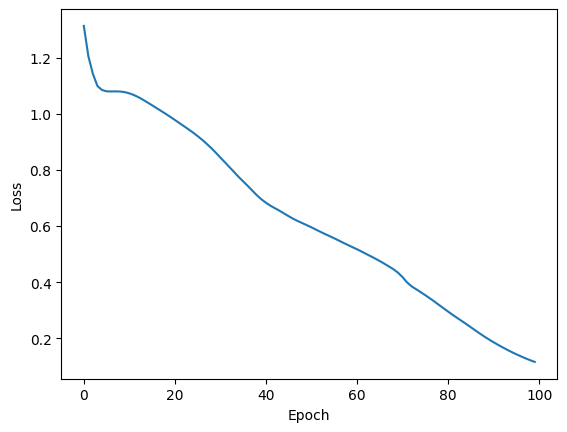

In [40]:
# Plot the loss
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')